# Домашнее задание №1

Задание выполнил(а): Закутняя Анна

### Общая информация

__Дата выдачи:__ 30.06.2020

__Дедлайн:__ 14.07.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(s_{\text{numpy}} + s_{\text{pandas}} + s_{\text{matplotlib}}\right) \times 10 / 21,
$$

где $s_{\text{numpy}}$, $s_{\text{pandas}}$ и $s_{\text{matplotlib}}$ — количество баллов, которое вы набрали за соответствующую часть.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Для доступа к курсу вам нужно зарегистрироваться в системе, войти в свой профиль, найти раздел "Активация инвайтов на курсы" и ввести инвайт.

Инвайт: lInNu4j

## Часть 1. Numpy (8 баллов)

In [1]:
import numpy as np

Во всех задачах этой части необходимо написать код решения внутри функции и проверить его работу на приведенных для вашего удобства тестах.

При решении задач можно использовать только библиотеку `numpy`. Запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде предполагается, что массив - это одномерный `numpy.array`, а матрица - это двумерный `numpy.array`. 

### 1

Создайте массив первых n нечетных натуральных чисел, записанных в порядке убывания. Например, если `n=5`, то ответом будет `array([9, 7, 5, 3, 1])`.

*Функции, которые могут пригодиться при решении: `.arange()`*

In [2]:
def first_even_numbers(n: int) -> np.array:
    return np.arange(n*2 - 1, 0, -2)

In [3]:
assert np.allclose(first_even_numbers(5), np.array([9, 7, 5, 3, 1]))
assert np.allclose(first_even_numbers(1), np.array([1]))
assert np.allclose(first_even_numbers(10), np.array([19, 17, 15, 13, 11, 9, 7, 5, 3, 1]))

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

*Функции, которые могут пригодиться при решении: `.arange()`*

In [4]:
def change_array(array: np.array, number: int) -> np.array:
    ind = np.arange(0, len(array), 3)
    array[ind] = number
    return array

In [5]:
array1 = np.array([3, 5, 1, 0, -3, 22, 213436])
number1 = -111
assert np.allclose(change_array(array1, number1), np.array([-111, 5, 1, -111, -3, 22, -111]))

array2 = np.array([3, 14, 15, 92, 6])
number2 = 8
assert np.allclose(change_array(array2, number2), np.array([8, 14, 15, 8, 6]))

### 3

Вычислите самое близкое и самое дальнее числа к данному в рассматриваемом массиве чисел. Например, если на вход поступают массив `array([3, 4, 2, 1, 0])` и число 1.33, то ответом будет `(1, 4)`.

_Функции, которые могут пригодиться при решении: `.abs()`, `.argmax()`, `.argmin()`_

In [6]:
def find_closest_distant(array: np.array, number: float) -> tuple:
    diff = np.abs(array - number)
    return (array[np.argmin(diff)], array[np.argmax(diff)])

In [7]:
array1 = np.array([3, 4, 2, 1, 0])
number1 = 1.33
assert find_closest_distant(array1, number1) == (1, 4)

array2 = np.array([-5, 3, 5, 6, 1, 9, -5])
number2 = 7.55
assert find_closest_distant(array2, number2) == (9, -5)

### 4

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными, также считать, что на диагонали есть хотя бы один ненулевой элемент.

_Функции, которые могут пригодиться при решении: `.diagonal()`, `.prod()`_

In [8]:
def diag_prod(matrix: np.array) -> int:
    diag = np.diagonal(matrix)
    return np.prod(diag[diag.nonzero()])

In [9]:
matrix1 = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])
assert diag_prod(matrix1) == 750

matrix2 = np.array([[0, 1, 2],
                   [3, 4, 5],
                   [6, 7, 8]])
assert diag_prod(matrix2) == 32

### 5

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

_Функции, которые могут пригодиться при решении: `.mean()`, `.std()`, `.nan_to_num()`_

In [10]:
def normalize(matrix: np.array) -> np.array:
    m = matrix.mean(axis=0)
    std = matrix.std(axis=0)
    return np.nan_to_num((matrix - m) / std)

In [11]:
matrix1 = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
assert np.allclose(
    normalize(matrix1),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

matrix2 = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])
assert np.allclose(
    normalize(matrix2),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

matrix3 = np.array([[0.1, 0.2, 0.3, 0.4], [0.1, 0.5, 0.6, 0.7]])
assert np.allclose(
    normalize(matrix3),
    np.array([[0, -1, -1, -1], [0, 1, 1, 1]])
)

/Users/pro/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


### 6

Напишите функцию, вычисляющую производную данного полинома. Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([12, 12, 0])`, соответствующий полиному $12x^2 + 12x$.

_Функции, которые могут пригодиться при решении: `.arange()`_

In [14]:
def derivative(coefs: np.array) -> np.array:
    coeff = coefs[::-1]
    powers = np.arange(len(coeff))
    deriv = list(coeff * powers)[1:]
    return  deriv[::-1]

In [15]:
coefs1 = np.array([4, 6, 0, 1])
assert np.allclose(
    derivative(coefs1),
    np.array([12, 12, 0])
)

coefs2 = np.array([1, 7, -12, 21, -6])
assert np.allclose(
    derivative(coefs2),
    np.array([4, 21, -24, 21])
)

### 7

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

_Функции, которые могут пригодиться при решении: `.T`, `.identity()`, `.diagonal`_

In [16]:
def make_symmetric(matrix: np.array) -> np.array:
    without_diag = matrix - np.diag(np.diag(matrix))
    return np.diag(np.diag(matrix)) + without_diag + without_diag.T

In [17]:
matrix1 = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
assert np.allclose(
    make_symmetric(matrix1),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

matrix2 = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])
assert np.allclose(
    make_symmetric(matrix2),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 8

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

_Функции, которые могут пригодиться при решении: `.linalg.norm()`_

In [18]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return (vec1 @ vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

In [19]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])
assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])
assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas (10 баллов)

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

### 1

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [24]:
df = pd.read_csv('train.csv')
print(f'Размер таблицы: {df.shape}')

Размер таблицы: (891, 12)


In [22]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 2

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Типы признаков:

__PassengerId:__      категориальный признак  
__Survived:__       категориальный признак  
__Pclass:__           порядковый признак  
__Name:__             категориальный признак  
__Sex:__              категориальный признак  
__Age:__              вещественный признак  
__SibSp:__            вещественный признак  
__Parch:__            вещественный признак  
__Ticket:__           категориальный признак  
__Fare:__             вещественный признак  
__Cabin:__            категориальный признак  
__Embarked:__         категориальный признак

### Задачи

__Задача регрессии:__ предсказать, сколько пассажир заплатил за билет, по его возрасту; по тому, выжил он или нет; по полу; по тому, где осуществил посадку на корабль; по обращению, содержащемуся в имени (Mr., Miss, Mrs. и т.д.).  
__Задача классификации:__ предсказать, выжил пассажир или нет.  
__Задача кластеризации:__ разделить пассажиров на кластеры, каждый из которых будет соотвестовать классу билета: 1, 2 или 3.

### 3

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [26]:
print(f'Доля выживших: {int(sum((df.Survived == 1)) / len(df.Survived) * 100)}%')
print(f'Доля женщин среди выживших после округления: {int(len(df[(df.Survived == 1) & (df.Sex == "female")]) / len(df[df.Survived == 1]) * 100)}%')
print(f'Доля мужчин среди выживших после округления: {int(len(df[(df.Survived == 1) & (df.Sex == "male")]) / len(df[df.Survived == 1]) * 100)}%')

Доля выживших: 38%
Доля женщин среди выживших после округления: 68%
Доля мужчин среди выживших после округления: 31%


### 4

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [27]:
print(f'В 1 классе ехало {sum(df.Pclass == 1)} пассажиров')
print(f'Во 2 классе ехало {sum(df.Pclass == 2)} пассажиров')
print(f'В 3 классе ехало {sum(df.Pclass == 3)} пассажиров')

print(f'В самом многолюдном классе ехало {sum((df.Pclass == 3) & (df.Sex == "female"))} женщины и {sum((df.Pclass == 3) & (df.Sex == "male"))} мужчин. Следовательно, мужчин было больше.')

В 1 классе ехало 216 пассажиров
Во 2 классе ехало 184 пассажиров
В 3 классе ехало 491 пассажиров
В самом многолюдном классе ехало 144 женщины и 347 мужчин. Следовательно, мужчин было больше.


### 5

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [40]:
print(f'Минимальная сумма: {int(df["Fare"].min())}.')
print(f'Минимальная сумма, котрую заплатили: {sorted(df["Fare"].unique())[1]}.')
print(f'Средняя сумма: {int(df["Fare"].mean())}.')
print(f'Максимальная сумма: {int(df["Fare"].max())}.')
print(' ')
print(f'Минимальная сумма для пассажиров из Саутгемптона: {int(df[df.Embarked == "S"]["Fare"].min())}.')
print(f'Минимальная сумма, котрую заплатили, для пассажиров из Саутгемптона: {int(sorted(df[df.Embarked == "S"]["Fare"].unique())[1])}.')
print(f'Средняя сумма для пассажиров из Саутгемптона: {int(df[df.Embarked == "S"]["Fare"].mean())}.')
print(f'Максимальная сумма для пассажиров из Саутгемптона: {int(df[df.Embarked == "S"]["Fare"].max())}.')

Минимальная сумма: 0.
Минимальная сумма, котрую заплатили: 4.0125.
Средняя сумма: 32.
Максимальная сумма: 512.
 
Минимальная сумма для пассажиров из Саутгемптона: 0.
Минимальная сумма, котрую заплатили, для пассажиров из Саутгемптона: 5.
Средняя сумма для пассажиров из Саутгемптона: 27.
Максимальная сумма для пассажиров из Саутгемптона: 263.


### 6

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

_PassengerId_ не является информативным признаком, поскольку является просто порядковым номером.   
_Ticket_ - это номер билета, который является уникальным набором букв и цифр, не указывающих на какую-либо содержательную информацию.   
_Cabin_ - номер каюты. Чтобы получить полезную инофрмацию из номера каюты необходимо знать, какие буквы и цифры в номере соотвествуют какому расположению на корабле. Мы не располагаем картой кают корабля. Кроме того, скорее всего расположение кают зависит от класса каюты, а информация о классе у нас уже учтена в переменной Pclass.

In [41]:
df = df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

### 7

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


В столбце Age есть 177 пропусков. В столбце Embarked - 2 пропуска.

### 8

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

Сначала заполним пропуски в столбце Age. Можно выдвинуть гипотезу, что чем выше класс билета, тем больше в среднем 
возраст пассажира. Эта гипотеза проходит проверку на данном датасете:

In [43]:
print(f'Средний возраст по всем пассажирам: {int(df["Age"].mean())} лет')
print(f'Средний возраст по пассажирам 1го класса: {int(df[df["Pclass"] == 1]["Age"].mean())} лет')
print(f'Средний возраст по пассажирам 2го класса: {int(df[df["Pclass"] == 2]["Age"].mean())} лет')
print(f'Средний возраст по пассажирам 3го класса: {int(df[df["Pclass"] == 3]["Age"].mean())} лет')

Средний возраст по всем пассажирам: 29 лет
Средний возраст по пассажирам 1го класса: 38 лет
Средний возраст по пассажирам 2го класса: 29 лет
Средний возраст по пассажирам 3го класса: 25 лет


Таким образом, можем заполнить пропуски в признаке Age средними возрастами по трем категорям класса билета.

In [44]:
df['Age'] = df["Age"].fillna(df.groupby('Pclass')['Age'].transform('mean'))

Для категориального признака - Embraked - можно сделать наоборот. Можно предположить, что для трех портов - C, Q и S - стоимость билета в среднем будет разная. На данной выборке предположение подтверждается:

In [45]:
df.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

Зная это, можно заменить пропуски в признаке Embarked, используя информацию о средней стоимости билета. Можно также заметить, что в двух случаях с пропущенными значениями стоимость билета была равна 80, что выше среднего по всем портам. Следовательно, можем заменить порт посадки в обоях случаях на C, где средняя стоимость билета была наибольшей.

In [46]:
null_idx = df[df['Embarked'].isnull()].index.tolist()
df.iloc[null_idx]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [47]:
df = df.fillna('C')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


### 9

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [48]:
df['Relatives'] = df['SibSp'] + df['Parch'] + 1

#Избавимся теперь от признаков SibSp и Parch, так как содержащуюся в них информацию мы уже учли в Relatives
df = df.drop(['SibSp', 'Parch'], axis=1)

In [50]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Relatives
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1


In [51]:
# Выделим обращения в отдельный признак
def get_honorific(name):
    return name.split(',')[1].split('.')[0].strip()

df['Honorific'] = df['Name'].apply(get_honorific)
df['Honorific'] = df['Honorific'].apply(lambda x: x if x in 
                                    ['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr'] else 'Misc')

# Теперь признак имя для нас не несет дополнительную ценность
df = df.drop(['Name'], axis=1)

In [52]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Honorific
0,0,3,male,22.0,7.2500,S,2,Mr
1,1,1,female,38.0,71.2833,C,2,Mrs
2,1,3,female,26.0,7.9250,S,1,Miss
3,1,1,female,35.0,53.1000,S,2,Mrs
4,0,3,male,35.0,8.0500,S,1,Mr


### 10

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения. Объясните свой выбор способа кодирования.

Применим one-hot кодирование к признакам Sex, Embarked, Honorific, кодирование позволит решить задачу перевода текстовых значений в числовые одним из наиболее простых и быстрых способов, к тому же при обучении и тестировании алгоритма машинного обучения, в частности регрессии, на данных с новыми бинарными признаками будет сохраняться интепретируемость коэффициентов модели.  
Стоит также отметить, что в нашей выборке количество признаков и значений признаков не велико, следовательно, one-hot кодировка не усложнит нашу работу с точки зрения задейстованной памяти и времени работы алгоритма.

In [53]:
sex = pd.get_dummies(df.Sex, prefix='Sex')
embarked = pd.get_dummies(df.Embarked, prefix='Embarked')
honorific = pd.get_dummies(df.Honorific, prefix='Honorific')

df_new = pd.concat([df['Survived'], sex, embarked, honorific, df['Age'], df['Pclass'], 
                    df['Fare'], df['Relatives']], axis=1)
df_new.head()

,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Honorific_Dr,Honorific_Master,Honorific_Misc,Honorific_Miss,Honorific_Mr,Honorific_Mrs,Honorific_Rev,Age,Pclass,Fare,Relatives
0,0,0,1,0,0,1,0,0,0,0,1,0,0,22.0,3,7.2500,2
1,1,1,0,1,0,0,0,0,0,0,0,1,0,38.0,1,71.2833,2
2,1,1,0,0,0,1,0,0,0,1,0,0,0,26.0,3,7.9250,1
3,1,1,0,0,0,1,0,0,0,0,0,1,0,35.0,1,53.1000,2
4,0,0,1,0,0,1,0,0,0,0,1,0,0,35.0,3,8.0500,1


# Часть 3. Matplotlib (3 балла)

### 1

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots`. Также полезными могут оказаться параметры `bins`, `ec`, `density` функции `plt.hist`, а также функции `set_xlabel`, `set_ylabel`, `set_title` и `plt.tight_layout`.

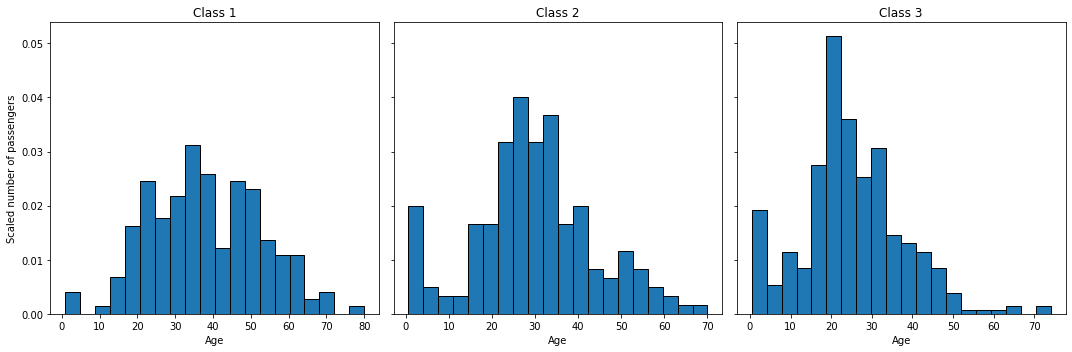

In [100]:
df = pd.read_csv('train.csv')

fig, ax = plt.subplots(1,3, figsize=(15,5), sharey=True)
ax[0].set_ylabel('Scaled number of passengers', fontsize=10)
for x in range(3):
    ax[x].set_xlabel('Age', fontsize=10)
    ax[x].set_title(f'Class {x+1}', fontsize=12)

df['Age'][df['Pclass'] == 1].hist( grid=False, bins=20, ax=ax[0], density=True, edgecolor = 'black')
df['Age'][df['Pclass'] == 2].hist(grid=False, bins=20, ax=ax[1], density=True,  edgecolor = 'black')
df['Age'][df['Pclass'] == 3].hist(grid=False, bins=20, ax=ax[2], density=True, edgecolor = 'black')

plt.tight_layout()

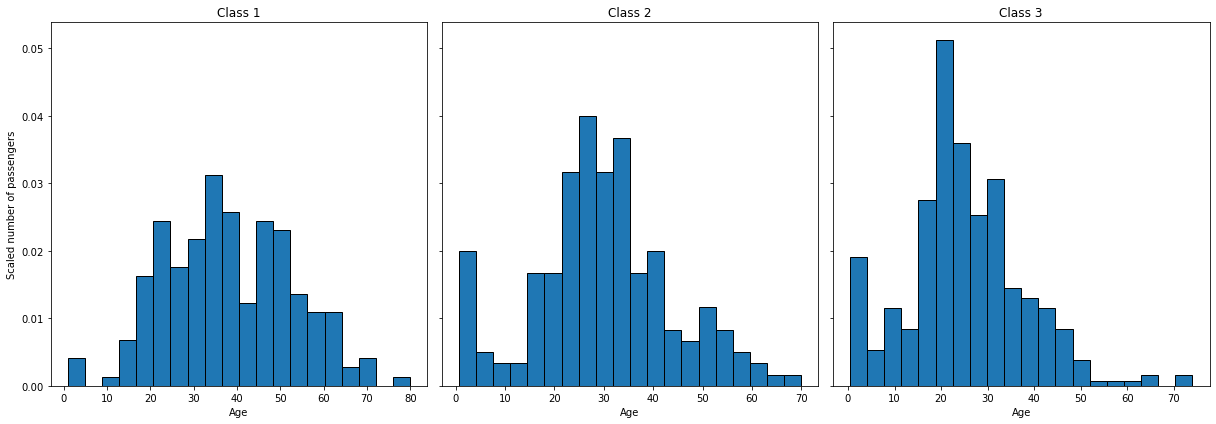

In [34]:
# В итоге ваш график должен получиться примерно таким:

### 2

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. Обозначьте выживших и погибших пассажиров разными цветами и маркерами. Также укажите на графике легенду.

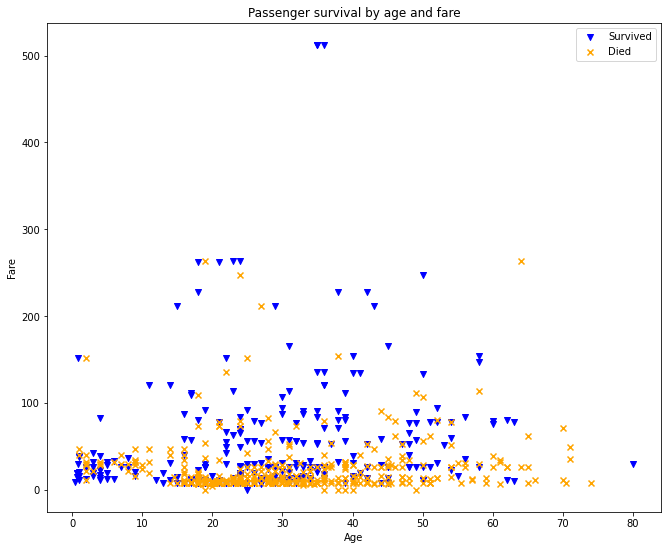

In [143]:
fig, ax = plt.subplots(figsize=(11, 9))
surv = plt.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'], marker='v', color='blue')
not_surv = plt.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'], marker='x', color='orange')
ax.set_title('Passenger survival by age and fare')
ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('Fare', fontsize=10)

plt.legend((surv, not_surv),
           ('Survived', 'Died'),
           loc='upper right',
           ncol=1,
           fontsize=10);

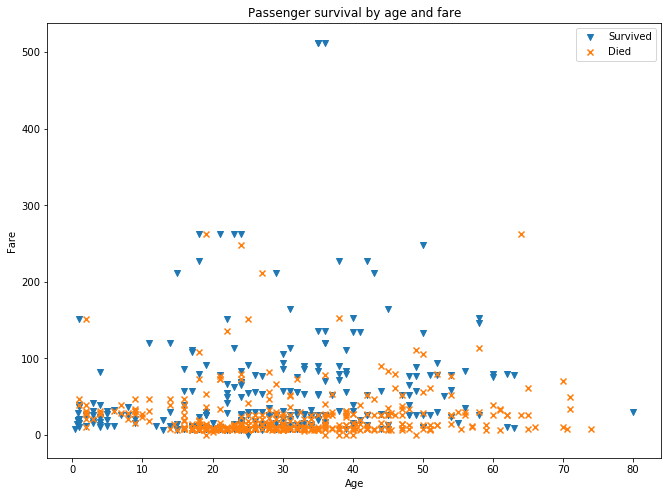

In [56]:
# В итоге ваш график должен получиться примерно таким:

### 3

Нарисуйте график косинуса для `x` от `-1` до `5`. Также пунктирной линией изобразите график синуса для `x` на том же промежутке. Укажите на графике легенду.

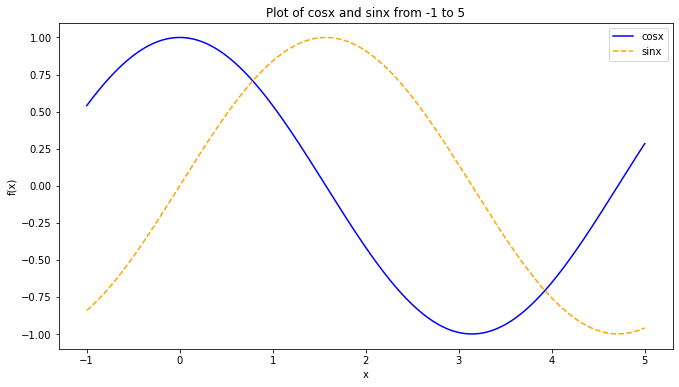

In [160]:
x = np.linspace(-1, 5, 1000)
fig, ax = plt.subplots(figsize=[11,6])
ax.plot(x, np.cos(x), '-', c='blue', label='cosx')
ax.plot(x, np.sin(x), '--', c='orange', label='sinx')
ax.set_title('Plot of cosx and sinx from -1 to 5')
ax.set_ylabel('f(x)')
ax.set_xlabel('x')

leg = ax.legend();

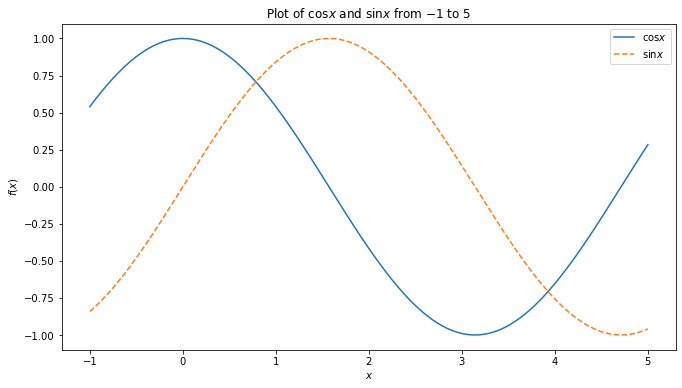

In [41]:
# В итоге ваш график должен получиться примерно таким: